# Part I - Ford GoBike Exploration
## by Skyla Ah Shene

## Introduction
> The Ford GoBike data is information concerning bike rides, and we will will only be focusing on the 2019 February dataset. It contains the following variables:
Trip Duration (seconds)
Start Time and Date
End Time and Date
Start Station ID
Start Station Name
Start Station Latitude
Start Station Longitude
End Station ID
End Station Name
End Station Latitude
End Station Longitude
Bike ID
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
source: https://www.lyft.com/bikes/bay-wheels/system-data


## Preliminary Wrangling

In [147]:
# import all the packages and set plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [148]:
# load the dataset
df_full = pd.read_csv('ford-gobike-data.csv')

In [149]:
df_full.shape

(183412, 16)

In [150]:
#preview the properties
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [151]:
df_full.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [152]:
df_full.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [153]:
#are there any null values?
df_full.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

The data tells us there are null values that we need to take care of.

In [154]:
df_full.duplicated().sum()

0

In [155]:
# create a copy of the original
df_full = df_full.copy()

In [156]:
# drop null values
df_full.dropna(axis = 0, inplace = True)

In [157]:
df_full.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [158]:
varss =['user_type', 'member_gender', 'bike_share_for_all_trip']
for var in varss:
    df_full[var] = df_full[var].astype('category')

In [159]:
# convert the datatypes
df_full['start_time'] = pd.to_datetime(df_full['start_time'])
df_full['end_time'] = pd.to_datetime(df_full['end_time'])

In [160]:
df_full.member_birth_year = df_full.member_birth_year.astype('int')

In [161]:
df_full['time_of_day'] = pd.to_datetime(df_full.start_time).dt.strftime('%p')
df_full.time_of_day

0         PM
2         PM
3         PM
4         PM
5         PM
6         PM
7         PM
8         PM
9         PM
10        PM
11        PM
12        PM
14        PM
15        PM
16        PM
17        PM
18        PM
19        PM
20        PM
21        PM
22        PM
23        PM
24        PM
25        PM
26        PM
27        PM
29        PM
30        PM
31        PM
32        PM
          ..
183381    AM
183382    AM
183383    AM
183384    AM
183385    AM
183386    AM
183387    AM
183388    AM
183389    AM
183390    AM
183391    AM
183392    AM
183393    AM
183394    AM
183395    AM
183396    AM
183397    AM
183398    AM
183399    AM
183400    AM
183401    AM
183403    AM
183404    AM
183405    AM
183406    AM
183407    AM
183408    AM
183409    AM
183410    AM
183411    AM
Name: time_of_day, Length: 174952, dtype: object

In [162]:
df_full['day_of_week'] = pd.to_datetime(df_full.start_time).dt.strftime('%A')
df_full['day_of_week']

0         Thursday
2         Thursday
3         Thursday
4         Thursday
5         Thursday
6         Thursday
7         Thursday
8         Thursday
9         Thursday
10        Thursday
11        Thursday
12        Thursday
14        Thursday
15        Thursday
16        Thursday
17        Thursday
18        Thursday
19        Thursday
20        Thursday
21        Thursday
22        Thursday
23        Thursday
24        Thursday
25        Thursday
26        Thursday
27        Thursday
29        Thursday
30        Thursday
31        Thursday
32        Thursday
            ...   
183381      Friday
183382      Friday
183383      Friday
183384      Friday
183385      Friday
183386      Friday
183387      Friday
183388      Friday
183389      Friday
183390      Friday
183391      Friday
183392      Friday
183393      Friday
183394      Friday
183395      Friday
183396      Friday
183397      Friday
183398      Friday
183399      Friday
183400      Friday
183401      Friday
183403      

In [163]:
df_full['duration_min'] = df_full['duration_sec']/60

df_full['start_date'] = df_full.start_time.dt.strftime('%Y-%m-%d')
df_full['start_hour_of_day'] = df_full.start_time.dt.strftime('%H')
df_full['start_day_of_week'] = df_full.start_time.dt.strftime('%A')
df_full['start_month'] = df_full.start_time.dt.strftime('%b')
df_full.head(10)

df_full['year_month'] = df_full['start_time'].dt.to_period('M')

In [164]:
# display the new clean data
df_full['duration_min']=df_full['duration_sec']/60
df_full['duration_hr']=df_full['duration_min']/60
df_full['duration_min']=df_full['duration_min'].astype(int)
df_full['duration_hr']=df_full['duration_hr'].astype(int)
df_full.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

      ...      bike_share_for_all_trip  time_of_day day_of_week  duration_min  \
0     ...                           No           PM    Thursday           869   
2     ...                           No           PM    Thursday          1030   
3     ...                           No           PM    Thursday           608   
4     ...                          Yes           PM    Thursday            26   
5     ...                           No           PM    Thursday            29   

   start_date start_hour_of_day start_day_of_week start_month  year_month  \
0  2019-02-28                17          Thursday         Feb     2019-02   
2  2019-02-28                12          Thursday         Feb     2019-02   
3  2019-02-28                17          Thursday         Feb     2019-02   
4  2019-02-28                23          Thursday         Feb     2019-02   
5  2019-02-28                23          Thursday         Feb     2019-02   

  duration_hr  
0          14  
2          17  
3          10  
4           0  
5           0  

[5 rows x 25 columns]

In [165]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 25 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
time_of_day                174952 non-null object
day_of_week   

In [166]:
df_full['start_station_id'] = df_full['start_station_id'][0]

In [167]:
type(df_full['start_date'][0])

str

In [168]:
df_full.user_type = df_full.user_type.astype('category')
df_full.bike_share_for_all_trip = df_full.bike_share_for_all_trip.astype('category')

In [169]:
# covert the datatypes
df_full.bike_id = df_full.bike_id.astype(str)
df_full.start_station_id = df_full.start_station_id.astype(str)
df_full.end_station_id = df_full.end_station_id.astype(str)

In [170]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 25 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
time_of_day                174952 non-null object
day_of_week    

### What is the structure of your dataset?

> The bikeshare dataset consists of 183412 rows and 16 columns.

### What is/are the main feature(s) of interest in your dataset?

> My main topic of research for this dataset is analysing and looking at the relationship between the different genders, subscribers and non-subscribers, and the most popular time of day.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> With the use of features like member_gender, user_type, bike_share_for_all_trip, start_day_of_week and duration_min alongside many other variables as well.

## Univariate Exploration

### Analysing the genders involved

Text(0.5,1,'Analysing the difference in genders relating to bike sharing')

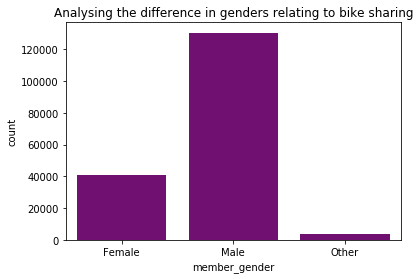

In [171]:
sb.countplot(data=df_full, x='member_gender', color='purple');
plt.title('Analysing the difference in genders relating to bike sharing')

The gender involved in bike sharing the most was the male gender, which were over 120000. That leaves the females with the lowest count of around about just over 40000. And the rest did not specify a specific gender.

### How many of these people were subscribers and how many were not?

Text(0.5,1,'Proportion of subscribers and non-subscribers')

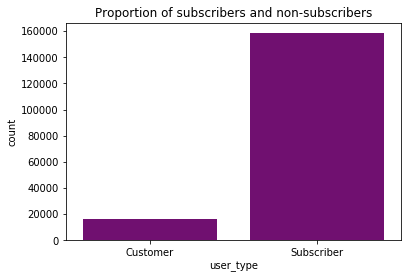

In [172]:
sb.countplot(data=df_full,x='user_type',color='purple');
plt.title('Proportion of subscribers and non-subscribers')

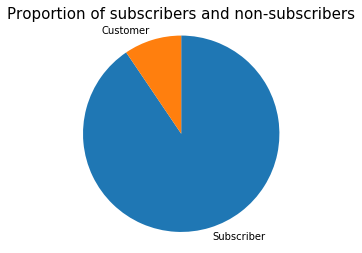

In [173]:
sorted_counts = df_full['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');
plt.title('Proportion of subscribers and non-subscribers', fontsize=15);

From this pie chart, we are able to see that majority of the people are subscribers and the rest are not. The minority are just randome customers who did not subscribe, but still made use of the services.

### Analysing the use of the bicycles (in minutes and in hours)

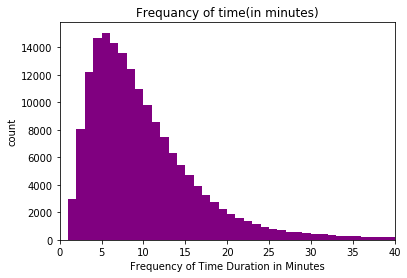

In [194]:
bins = np.arange(0, df_full['duration_min'].max()+1, 1)
plt.hist(data = df_full, x = 'duration_min', color = 'purple', bins = bins)
plt.xlim([0,40])
plt.xlabel('Frequency of Time Duration in Minutes')
plt.ylabel('count')
plt.title('Frequancy of time(in minutes)')
plt.show()

The most amount of time (in muntes) that the bikes are used most frequantly for, are approximately around 4-7 minutes and the most time that someone had used it for, was 40 minutes.

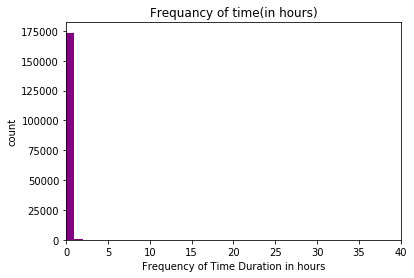

In [198]:
bins = np.arange(0, df_full['duration_hr'].max()+1, 1)
plt.hist(data = df_full, x = 'duration_hr', color = 'purple', bins = bins)
plt.xlim([0,40])
plt.xlabel('Frequency of Time Duration in hours')
plt.ylabel('count')
plt.title('Frequancy of time(in hours)')
plt.show()

This confirms that no one cycled for more than an hour.

### Relationship between the birth year and duration of ride

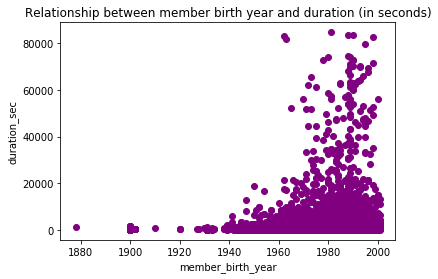

In [184]:
plt.scatter(data = df_full, x = 'member_birth_year', y = 'duration_sec', color = 'purple', alpha = 1)
plt.xlabel('member_birth_year')
plt.ylabel('duration_sec')
plt.title('Relationship between member birth year and duration (in seconds)');

This is a great representation of how the older someone is, is directly proportional to least amount of time they spend riding a bike.

### Frequancy of the duration (in minutes)

Text(0.5,1,'Proportion of members that made use of the bike sharing scheme')

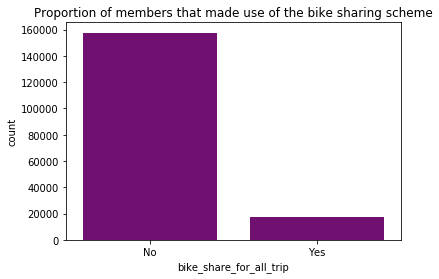

In [175]:
sb.countplot(data=df_full,x='bike_share_for_all_trip',color='purple')
plt.title('Proportion of members that made use of the bike sharing scheme')

According to this data, over 150000 members did not make use of the bike sharing scheme, and the other members that are at least 20000 people, made use of this scheme for all their trips.

### What time of day has the most engagements?

Text(0.5,1,'What time of day has the most engagements')

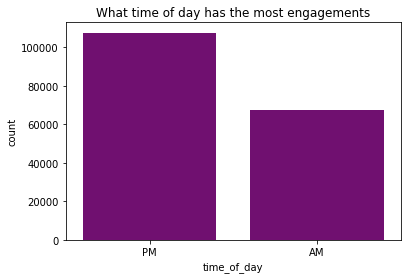

In [176]:
sb.countplot(data=df_full,x='time_of_day',color='purple');
plt.title('What time of day has the most engagements')

From this information, we may deduce that most of the engagements are made from the afternoons onwards, and the time of day where there is little activity is during the early hours of the day.

### The daily bike rides recorded within a week

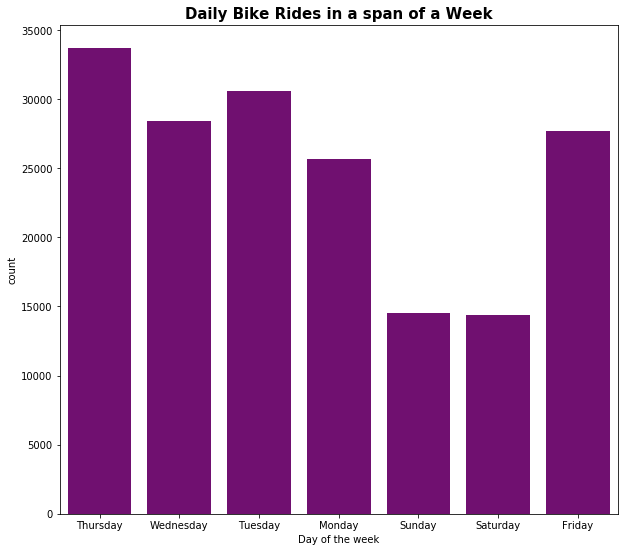

In [177]:
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10,9))
sb.countplot(data=df_full, x='start_day_of_week', color='purple')
plt.title('Daily Bike Rides in a span of a Week', fontsize=15, fontweight='bold')
plt.xlabel('Day of the week');

We are able to see a common trend of the bikes being mainly used during the week. This could be due to the large amount of people who use bikes as a form of transformation to get to school or work. It seems as though the bikes are used less during the weekends.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations? Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was quite a bit of cleaning that needed to be done in order to read and analyse the data better. Such as dropping the null values, converting certain data types to datetime or strings etc. The main points that we can conduct so far from this analysis is that the most popular gender to make use of the bike sharing scheme were males and subscribers over random customers. The bikes werent really used in the early parts of the day and on the weekends.

## Bivariate Exploration

### Relationship between the type of user and gender

Text(0.5,1,'Relationship between the user type and gender')

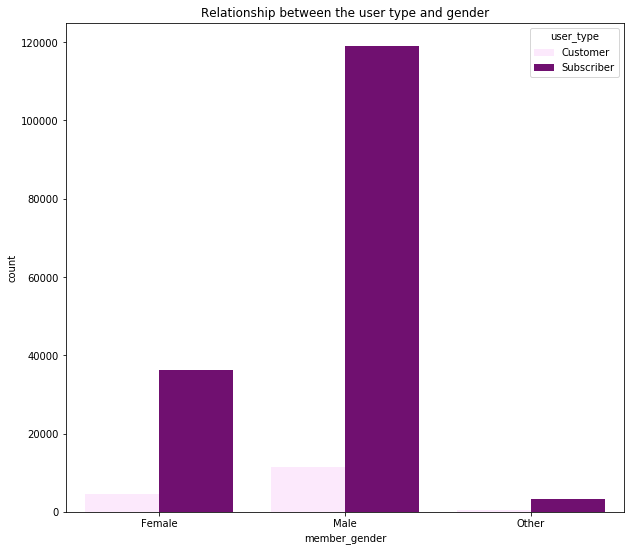

In [178]:
plt.figure(figsize=[10,9])
sb.countplot(data=df_full,x='member_gender', color = 'purple', hue='user_type');
plt.title('Relationship between the user type and gender')

It is clear that there is greater relationship between the males and being a subscriber. The gender with the least subscribers are females.

### Relationship between the different genders and how many times the bike sharing scheme was used

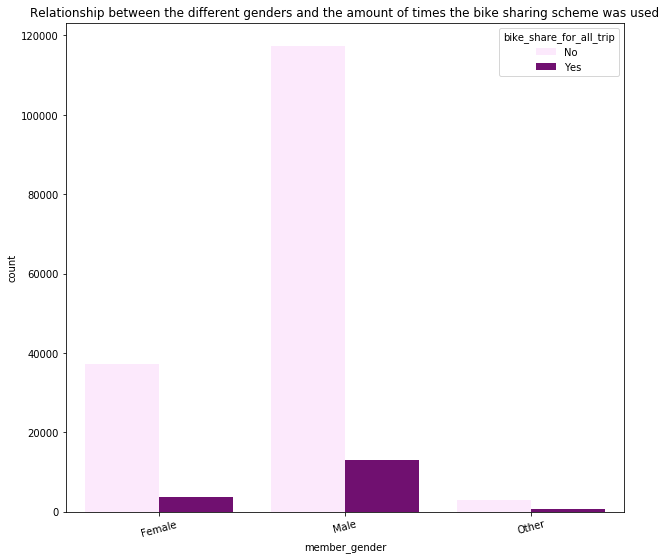

In [179]:
plt.figure(figsize =[10,9])
sb.countplot(data = df_full, x = 'member_gender', color = 'purple', hue = 'bike_share_for_all_trip')
plt.title('Relationship between the different genders and the amount of times the bike sharing scheme was used')
plt.xticks(rotation = 15);

It is very clear that the there were more males that made use of the bike sharing scheme, but there was also alot more males who didnt use it as well versus the femals who did and didnt use it alot less.

### Gender distribution during a week

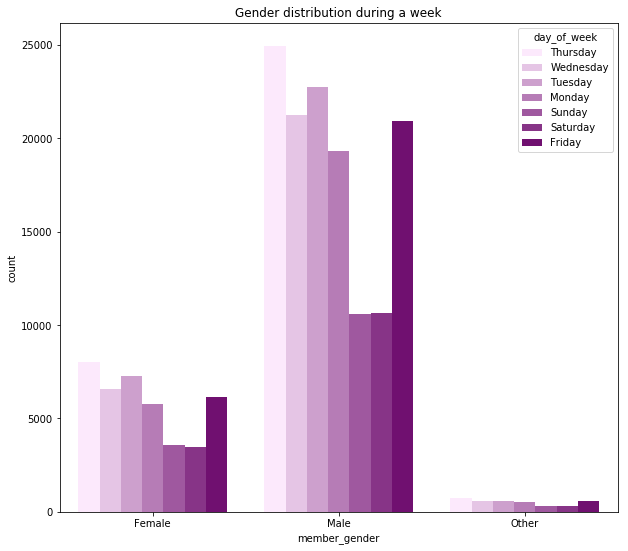

In [180]:
plt.figure(figsize=[10,9])
sb.countplot(data=df_full,x='member_gender', color = 'purple', hue='day_of_week')
plt.title('Gender distribution during a week');

When we compared the males to the females, the males seem to use the bikes more than the females anyday of the week. There is drastic difference between the two genders.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> When we directly compared the relationship between the gender of a bike user and the user type, we found that the majorty of males were subscribers and only a small portion were random customers and found similar results with most females being subscribers too. We also analysed how the gender and the frequancy of using the bike sharing scheme compared. The result was that majority of men did not make use of the bike sharing scheme for trips, and it was the same result for the woman. And lastly, we compared the gender distribution during a week. The results were not surprising in the sense that males make use of the bikes more often than females do during a week.

## Multivariate Exploration

### Subscriber / non-subscriber distribution during the week (in minutes)

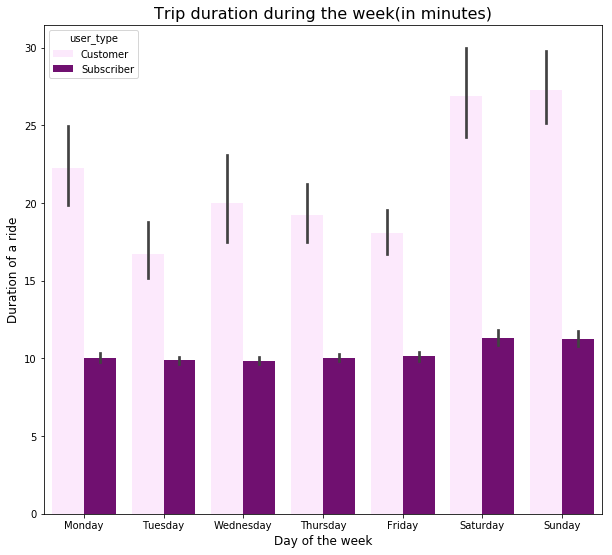

In [181]:
plt.figure(figsize=(10,9))

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_full['start_day_of_week'] = df_full['start_day_of_week'].astype(weekdaycat)

sb.barplot(data=df_full, x='start_day_of_week', y='duration_min', color = 'purple', hue='user_type')
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Duration of a ride', fontsize=12)
plt.title("Trip duration during the week(in minutes)", fontsize=16);

From this barchart we can clearly see that the trips are mainly made by random customers instead of subscribers. There are big gaps between the amount of subscriber and those who are not. The customers seem to have longer rides on the weekends than during the week, and the subscribers almost have an equal spread of time they spend riding during the entire week with just a slight increase during the weekend.

### Trip duration during the week (hourly)

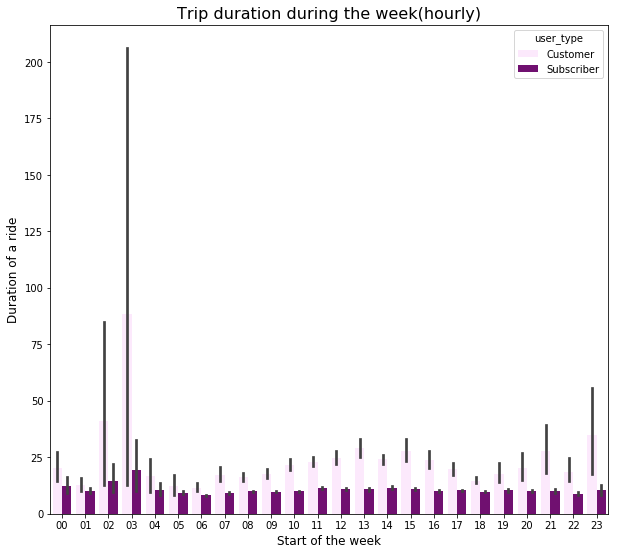

In [182]:
plt.figure(figsize=(10, 9))
sb.barplot(data=df_full, x='start_hour_of_day', y='duration_min', color = 'purple', hue='user_type')
plt.xlabel('Start of the week', fontsize=12)
plt.ylabel('Duration of a ride', fontsize=12)
plt.title("Trip duration during the week(hourly)", fontsize=16);

From this data we are able to see that the bikes are mainly used in the early parts of the day by subscribers, and the non-subscribers also mainly use them at the start of the day but we can see they use it till later throughout the day as well versus the subscribers.

Text(0.5,1,'Relationship between the gender, birth year and duration (in sec)')

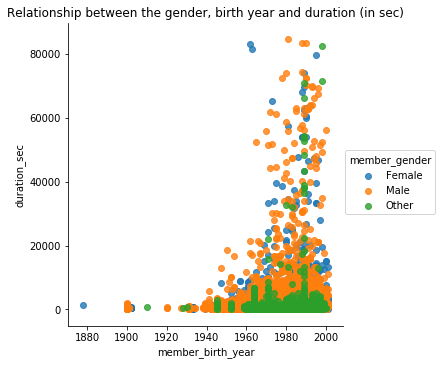

In [191]:
sb.lmplot(x='member_birth_year', y='duration_sec', hue='member_gender', data = df_full, fit_reg=False)
plt.title('Relationship between the gender, birth year and duration (in sec)')

From this data we are able to see that the most popular users are younger males, and they are able ride for longer durations. It is similar for the females who are younger.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest? Were there any interesting or surprising interactions between features?

> By cleaning and analysing the outcomes and data, I was able to learn and distinguish alot of things about the bike sharing scheme. I was able to see that the males, whether being a subscriber or a random customer, was the gender that made use of the bike sharing scheme the most. We can also assume that the subscribers were regulars who used it throughout the week instead of weekends, to get to work or school or appointments etc, and the non-subscribers might of have only used if it was their last option or for recreational purposes on the weekends, explaining the spike.